In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

"""
Dataset Kaggle
https://www.kaggle.com/harlfoxem/housesalesprediction

Referencias
https://www.kaggle.com/bsivavenu/house-price-calculation-methods-for-beginners?select=test.csv
https://www.uv.es/webgid/Descriptiva/43_normal.html
https://www.disfrutalasmatematicas.com/datos/desviacion-estandar.html
https://nextjournal.com/schmudde/how-to-remove-outliers-in-data
https://stackoverflow.com/questions/4761623/changing-the-color-of-the-axis-ticks-and-labels-for-a-plot-in-matplotlib
"""

'\nDataset Kaggle\nhttps://www.kaggle.com/harlfoxem/housesalesprediction\n\nReferencias\nhttps://www.kaggle.com/bsivavenu/house-price-calculation-methods-for-beginners?select=test.csv\nhttps://www.uv.es/webgid/Descriptiva/43_normal.html\nhttps://www.disfrutalasmatematicas.com/datos/desviacion-estandar.html\nhttps://nextjournal.com/schmudde/how-to-remove-outliers-in-data\nhttps://stackoverflow.com/questions/4761623/changing-the-color-of-the-axis-ticks-and-labels-for-a-plot-in-matplotlib\n'

In [3]:
# Load CSV as Dataframe
df = pd.read_csv('kc_house_data.csv')  # load data set
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


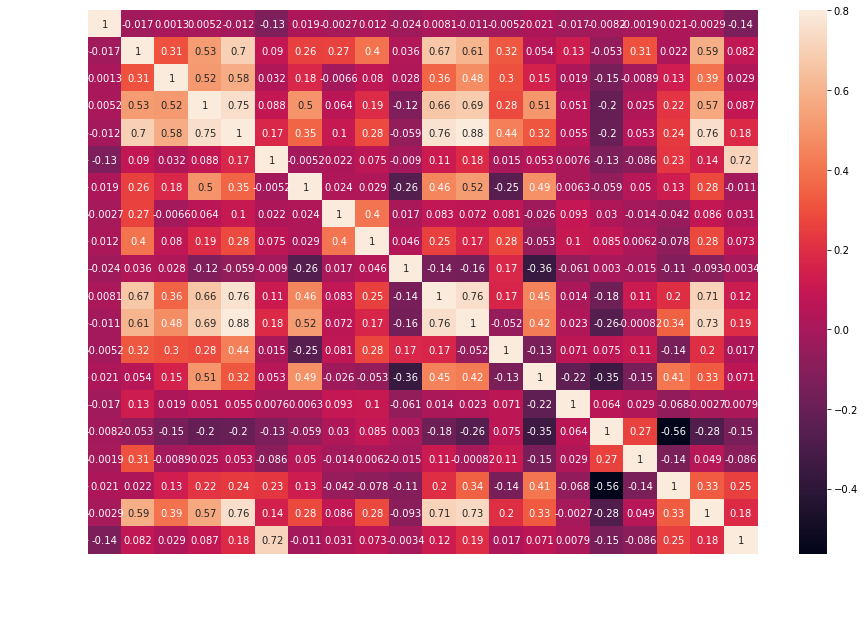

In [4]:
# Plot correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax=.8, annot=True)
plt.tick_params(colors='white')
plt.show()

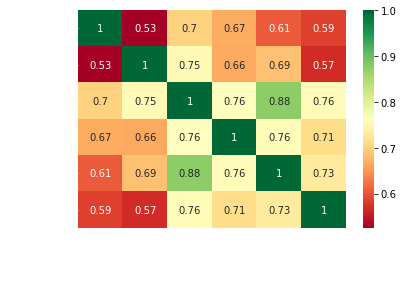

In [5]:
# Print most correlated features
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["price"]) > 0.5]
plt.figure()
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.tick_params(colors='white')
plt.show()


 mu (media) = 540088.14 and sigma (std des) = 367118.70



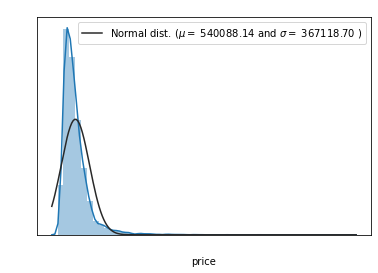

In [6]:
# Print normal distribution for price
sns.distplot(df['price'], fit=norm)

(mu, sigma) = norm.fit(df['price'])
print('\n mu (media) = {:.2f} and sigma (std des) = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.tick_params(colors='white')
plt.show()

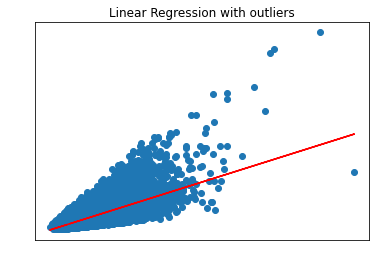

In [9]:
# First Linear Regression
X = df.iloc[:, 5].values.reshape(-1, 1)
y = df.iloc[:, 2]

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, y)
plt.title("Linear Regression with outliers")
plt.ylabel("price", color="white")
plt.xlabel("sqft_living", color="white")
plt.plot(X, Y_pred, color='red')
plt.tick_params(colors='white',labelcolor="white")
plt.show()


In [10]:
# Remove outliers
Y_no_o = df.sqft_living[df.sqft_living.between(df.sqft_living.quantile(.5), df.sqft_living.quantile(.95))]
new_df = df.iloc[Y_no_o.axes[0]]

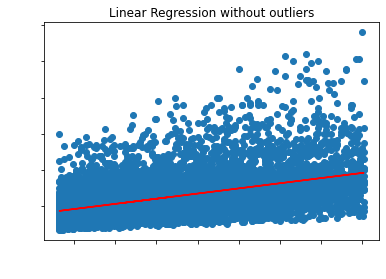

In [11]:
# Print Linear regression without outliers
X = new_df.iloc[:, 5].values.reshape(-1, 1)
y = new_df.iloc[:, 2]

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, y)
plt.title("Linear Regression without outliers")
plt.ylabel("price", color="white")
plt.xlabel("sqft_living",color="white")
plt.plot(X, Y_pred, color='red')
plt.tick_params(colors='black',labelcolor="white")
plt.show()

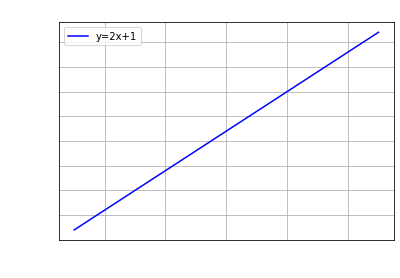

In [23]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5,5,100)
x
y = 2*x+1
plt.plot(x, y, '-r', label='y=2x+1', color="blue")
plt.title('Graph of y=2x+1', color='white')
plt.xlabel('x', color='white')
plt.ylabel('y', color='white')
plt.legend(loc='upper left')
plt.tick_params(color= 'white',labelcolor="white")
plt.grid()
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

#Print Intercept and regressor:
print(linear_regressor.intercept_)
print(linear_regressor.coef_)

y_pred = linear_regressor.predict(X_test)
df_compare1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

ValueError: Found input variables with inconsistent numbers of samples: [389034, 100]

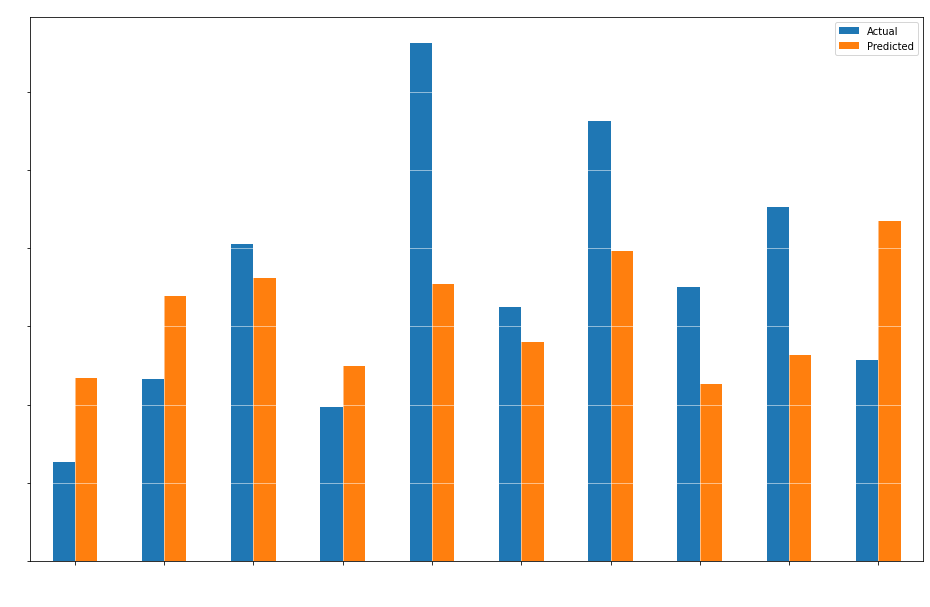

In [13]:
df1 = df_compare1.sample(n = 10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='white')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.tick_params(labelcolor="white")
plt.show()

In [14]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 186239.25090216863
Mean Squared Error: 66492904581.86643
Root Mean Squared Error: 257862.18137188407


In [16]:
# Remove NA values
df.isnull().any()
df = df.fillna(method='ffill')
X= pd.melt(df,id_vars=["sqft_living","grade","sqft_above"])
# X = df[["sqft_living","grade","sqft_above"]]
y = df["price"]
X

,sqft_living,grade,sqft_above,variable,value
0,1180,7,1180,id,7129300520
1,2570,7,2170,id,6414100192
2,770,6,770,id,5631500400
3,1960,7,1050,id,2487200875
4,1680,8,1680,id,1954400510
...,...,...,...,...,...
389029,1530,8,1530,sqft_lot15,1509
389030,2310,8,2310,sqft_lot15,7200
389031,1020,7,1020,sqft_lot15,2007
389032,1600,8,1600,sqft_lot15,1287


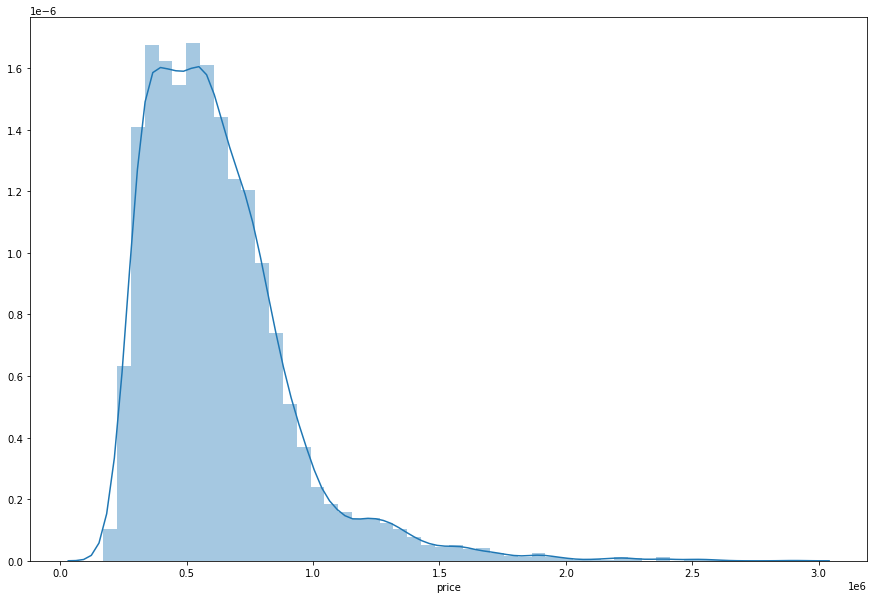

In [17]:
import seaborn as seabornInstance
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(new_df['price'])


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

ValueError: Found input variables with inconsistent numbers of samples: [389034, 21613]

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)



In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df_compare2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df_compare2.sample(n = 10)
df2

In [ ]:
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test, y_pred)))
